In [1]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px

import os
import datetime as dt

In [57]:
plt.style.use('dark_background')
mpl.rcParams['figure.figsize'] = (12, 6)

In [7]:
data_path = '/home/sid/mystuff/myprogs/flirt/projects/product_analytics/customer_segmentation/data/raw'

In [8]:
dataset = os.path.join(data_path, 'online_retail.xlsx')

In [14]:
## need to install openpyxl first with !pip install openpyxl

df = pd.read_excel(dataset, parse_dates=True, engine='openpyxl')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df.shape

(541909, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [18]:
df['InvoiceDate'].describe()

count                  541909
unique                  23260
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [20]:
## separate year and month from InvoiceDate
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda d: 100 * d.year + d.month)

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012


In [22]:
df['Revenue'] = df['UnitPrice'] * df['Quantity']

In [50]:
## Monthly Revenue
df_revenue = df.groupby('InvoiceYearMonth')['Revenue'].sum().reset_index()

In [51]:
df_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


In [67]:
df['InvoiceYearMonth'] = pd.to_datetime(df['InvoiceYearMonth'], 
                                                format='%Y%m')

In [52]:
df_revenue['InvoiceYearMonth'] = pd.to_datetime(df_revenue['InvoiceYearMonth'], 
                                                format='%Y%m')

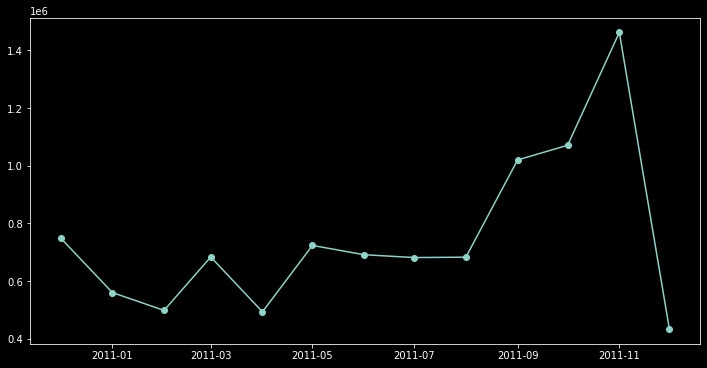

In [58]:
plt.plot(df_revenue['InvoiceYearMonth'], 
         df_revenue['Revenue'], marker='o')
plt.show()

In [59]:
df_revenue['MonthlyGrowth'] = df_revenue['Revenue'].pct_change()

In [60]:
df_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,2010-12-01,748957.020,NaN
1,2011-01-01,560000.260,-0.252293
2,2011-02-01,498062.650,-0.110603
3,2011-03-01,683267.080,0.371850
4,2011-04-01,493207.121,-0.278163


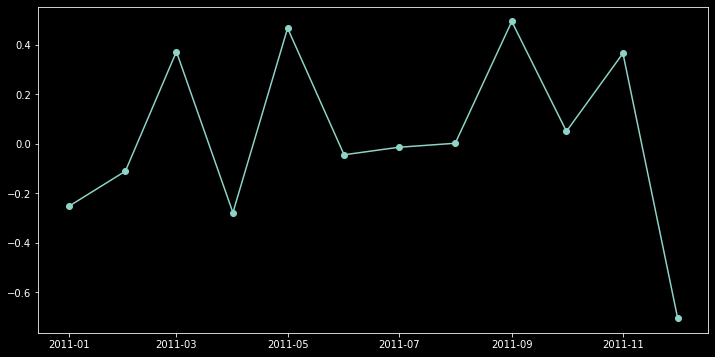

In [61]:
plt.plot(df_revenue['InvoiceYearMonth'], 
         df_revenue['MonthlyGrowth'], marker='o')
plt.show()

In [68]:
df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).astype(int)

Country
United Kingdom          8187806
Netherlands              284661
EIRE                     263276
Germany                  221698
France                   197403
Australia                137077
Switzerland               56385
Spain                     54774
Belgium                   40910
Sweden                    36595
Japan                     35340
Norway                    35163
Portugal                  29367
Finland                   22326
Channel Islands           20086
Denmark                   18768
Italy                     16890
Cyprus                    12946
Austria                   10154
Hong Kong                 10117
Singapore                  9120
Israel                     7907
Poland                     7213
Unspecified                4749
Greece                     4710
Iceland                    4309
Canada                     3666
Malta                      2505
United Arab Emirates       1902
USA                        1730
Lebanon                    1693


In [69]:
df_uk = df.query("Country=='United Kingdom'").reset_index(drop=True)
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [70]:
## monthly acive users in uk
df_monthly_active = df_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

In [71]:
df_monthly_active

,InvoiceYearMonth,CustomerID
0,2010-12-01,871
1,2011-01-01,684
2,2011-02-01,714
3,2011-03-01,923
4,2011-04-01,817
5,2011-05-01,985
6,2011-06-01,943
7,2011-07-01,899
8,2011-08-01,867
9,2011-09-01,1177


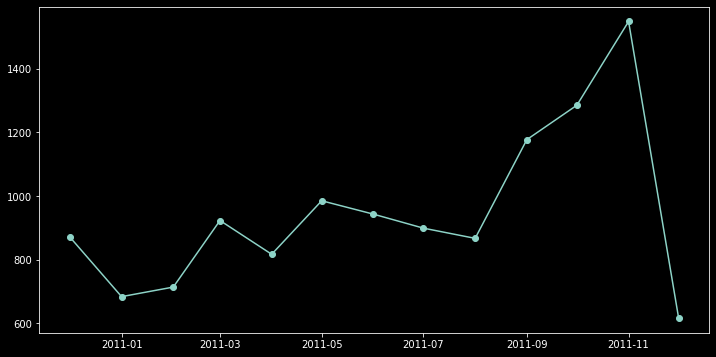

In [73]:
plt.plot(df_monthly_active['InvoiceYearMonth'], 
         df_monthly_active['CustomerID'], marker='o')
plt.show()

In [74]:
df_monthly_sales = df_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

In [75]:
df_monthly_sales

,InvoiceYearMonth,Quantity
0,2010-12-01,298101
1,2011-01-01,237381
2,2011-02-01,225641
3,2011-03-01,279843
4,2011-04-01,257666
5,2011-05-01,306452
6,2011-06-01,258522
7,2011-07-01,324129
8,2011-08-01,319804
9,2011-09-01,458490


In [76]:
df_monthly_sales['Quantity'].mean()

327986.8461538461

In [77]:
df_monthly_order_avg = df_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()

In [78]:
df_monthly_order_avg

,InvoiceYearMonth,Revenue
0,2010-12-01,16.865860
1,2011-01-01,13.614680
2,2011-02-01,16.093027
3,2011-03-01,16.716166
4,2011-04-01,15.773380
5,2011-05-01,17.713823
6,2011-06-01,16.714748
7,2011-07-01,15.723497
8,2011-08-01,17.315899
9,2011-09-01,18.931723


In [80]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495478 entries, 0 to 495477
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         495478 non-null  object        
 1   StockCode         495478 non-null  object        
 2   Description       494024 non-null  object        
 3   Quantity          495478 non-null  int64         
 4   InvoiceDate       495478 non-null  datetime64[ns]
 5   UnitPrice         495478 non-null  float64       
 6   CustomerID        361878 non-null  float64       
 7   Country           495478 non-null  object        
 8   InvoiceYearMonth  495478 non-null  datetime64[ns]
 9   Revenue           495478 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 37.8+ MB


## New and Existing Users

In [81]:
tx_min_purchase = df_uk.groupby('CustomerID').InvoiceDate.min().reset_index()

In [82]:
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']

In [83]:
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

In [84]:
tx_min_purchase

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101
...,...,...,...
3945,18280.0,2011-03-07 09:52:00,201103
3946,18281.0,2011-06-12 10:53:00,201106
3947,18282.0,2011-08-05 13:35:00,201108
3948,18283.0,2011-01-06 14:14:00,201101


In [85]:
tx_uk = pd.merge(df_uk, tx_min_purchase, on='CustomerID')

In [88]:
tx_uk['MinPurchaseYearMonth'] = pd.to_datetime(tx_uk['MinPurchaseYearMonth'], 
                                               format='%Y%m')

In [89]:
tx_uk['UserType'] = 'New'
tx_uk.loc[tx_uk['InvoiceYearMonth']>tx_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'

In [90]:
tx_uk.UserType.value_counts()

Existing    256114
New         105764
Name: UserType, dtype: int64

In [91]:
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,2010-12-01 08:26:00,2010-12-01,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01 08:26:00,2010-12-01,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,2010-12-01 08:26:00,2010-12-01,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01 08:26:00,2010-12-01,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01 08:26:00,2010-12-01,New


In [92]:
tx_user_type_revenue = tx_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

In [95]:
tx_user_type_revenue.query("InvoiceYearMonth != 20101201 and InvoiceYearMonth != 20111201")

,InvoiceYearMonth,UserType,Revenue
1,2011-01-01,Existing,195275.510
2,2011-01-01,New,156705.770
3,2011-02-01,Existing,220994.630
4,2011-02-01,New,127859.000
5,2011-03-01,Existing,296350.030
6,2011-03-01,New,160567.840
7,2011-04-01,Existing,268226.660
8,2011-04-01,New,108517.751
9,2011-05-01,Existing,434725.860
10,2011-05-01,New,90847.490


In [96]:
tx_user_type_revenue = tx_user_type_revenue.query("InvoiceYearMonth != 20101201 and InvoiceYearMonth != 20111201")

In [97]:
tx_user_ratio = tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()

In [98]:
tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()

InvoiceYearMonth
2010-12-01    871
2011-01-01    362
2011-02-01    339
2011-03-01    408
2011-04-01    276
2011-05-01    252
2011-06-01    207
2011-07-01    172
2011-08-01    140
2011-09-01    275
2011-10-01    318
2011-11-01    296
2011-12-01     34
Name: CustomerID, dtype: int64

In [99]:
tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()

InvoiceYearMonth
2011-01-01     322
2011-02-01     375
2011-03-01     515
2011-04-01     541
2011-05-01     733
2011-06-01     736
2011-07-01     727
2011-08-01     727
2011-09-01     902
2011-10-01     967
2011-11-01    1252
2011-12-01     583
Name: CustomerID, dtype: int64

### Create Signup Data

In [102]:
tx_min_purchase['MinPurchaseYearMonth'] = pd.to_datetime(tx_min_purchase['MinPurchaseYearMonth'], 
                                               format='%Y%m')

In [103]:
tx_min_purchase.head()

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,2011-01-01
1,12747.0,2010-12-05 15:38:00,2010-12-01
2,12748.0,2010-12-01 12:48:00,2010-12-01
3,12749.0,2011-05-10 15:25:00,2011-05-01
4,12820.0,2011-01-17 12:34:00,2011-01-01


In [104]:
unq_month_year =  tx_min_purchase.MinPurchaseYearMonth.unique()

In [105]:
unq_month_year

array(['2011-01-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000',
       '2011-05-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-10-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-06-01T00:00:00.000000000',
       '2011-03-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [106]:
def generate_signup_date(year_month):
    signup_date = [el for el in unq_month_year if year_month >= el]
    return np.random.choice(signup_date)

In [107]:
tx_min_purchase['SignupYearMonth'] = tx_min_purchase.apply(lambda row: generate_signup_date(row['MinPurchaseYearMonth']),axis=1)

In [108]:
tx_min_purchase['InstallYearMonth'] = tx_min_purchase.apply(lambda row: generate_signup_date(row['SignupYearMonth']),axis=1)

In [109]:
tx_min_purchase.head()

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth,SignupYearMonth,InstallYearMonth
0,12346.0,2011-01-18 10:01:00,2011-01-01,2011-01-01,2011-01-01
1,12747.0,2010-12-05 15:38:00,2010-12-01,2010-12-01,2010-12-01
2,12748.0,2010-12-01 12:48:00,2010-12-01,2010-12-01,2010-12-01
3,12749.0,2011-05-10 15:25:00,2011-05-01,2011-01-01,2010-12-01
4,12820.0,2011-01-17 12:34:00,2011-01-01,2010-12-01,2010-12-01


In [110]:
channels = ['organic','inorganic','referral']

In [111]:
tx_min_purchase['AcqChannel'] = tx_min_purchase.apply(lambda x: np.random.choice(channels),axis=1)

## Activation Rate

In [112]:
tx_activation = tx_min_purchase[tx_min_purchase['MinPurchaseYearMonth'] == tx_min_purchase['SignupYearMonth']].groupby('SignupYearMonth').CustomerID.count()/tx_min_purchase.groupby('SignupYearMonth').CustomerID.count()
tx_activation = tx_activation.reset_index()

In [113]:
tx_activation_ch = tx_min_purchase[tx_min_purchase['MinPurchaseYearMonth'] == tx_min_purchase['SignupYearMonth']].groupby(['SignupYearMonth','AcqChannel']).CustomerID.count()/tx_min_purchase.groupby(['SignupYearMonth','AcqChannel']).CustomerID.count()
tx_activation_ch = tx_activation_ch.reset_index()

In [115]:
tx_activation_ch.head(10)

,SignupYearMonth,AcqChannel,CustomerID
0,2010-12-01,inorganic,0.582329
1,2010-12-01,organic,0.573614
2,2010-12-01,referral,0.578189
3,2011-01-01,inorganic,0.272340
4,2011-01-01,organic,0.273171
5,2011-01-01,referral,0.279817
6,2011-02-01,inorganic,0.228571
7,2011-02-01,organic,0.190751
8,2011-02-01,referral,0.243421
9,2011-03-01,inorganic,0.350877


### Monthly Retention Rate

In [116]:
df_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

In [117]:
tx_user_purchase = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().astype(int).reset_index()

In [118]:
tx_user_purchase

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,2011-01-01,0
1,12747.0,2010-12-01,706
2,12747.0,2011-01-01,303
3,12747.0,2011-03-01,310
4,12747.0,2011-05-01,771
...,...,...,...
12325,18283.0,2011-10-01,114
12326,18283.0,2011-11-01,651
12327,18283.0,2011-12-01,208
12328,18287.0,2011-05-01,765


In [119]:
tx_user_purchase.Revenue.sum()

6762528

In [120]:
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()

In [121]:
tx_retention.head()

InvoiceYearMonth,CustomerID,2010-12-01 00:00:00,2011-01-01 00:00:00,2011-02-01 00:00:00,2011-03-01 00:00:00,2011-04-01 00:00:00,2011-05-01 00:00:00,2011-06-01 00:00:00,2011-07-01 00:00:00,2011-08-01 00:00:00,2011-09-01 00:00:00,2011-10-01 00:00:00,2011-11-01 00:00:00,2011-12-01 00:00:00
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [122]:
months = tx_retention.columns[2:]

In [123]:
months

Index([2011-01-01 00:00:00, 2011-02-01 00:00:00, 2011-03-01 00:00:00,
       2011-04-01 00:00:00, 2011-05-01 00:00:00, 2011-06-01 00:00:00,
       2011-07-01 00:00:00, 2011-08-01 00:00:00, 2011-09-01 00:00:00,
       2011-10-01 00:00:00, 2011-11-01 00:00:00, 2011-12-01 00:00:00],
      dtype='object', name='InvoiceYearMonth')

In [125]:
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = selected_month.strftime('%Y%m')
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

In [126]:
tx_retention = pd.DataFrame(retention_array)
tx_retention.head(10)

,InvoiceYearMonth,TotalUserCount,RetainedUserCount
0,201102,714,263
1,201103,923,305
2,201104,817,310
3,201105,985,369
4,201106,943,417
5,201107,899,379
6,201108,867,391
7,201109,1177,417
8,201110,1285,502
9,201111,1548,616


In [127]:
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']

In [128]:
tx_retention['InvoiceYearMonth'] = pd.to_datetime(tx_retention['InvoiceYearMonth'], 
                                               format='%Y%m')
tx_retention.head()

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,2011-02-01,714,263,0.368347
1,2011-03-01,923,305,0.330444
2,2011-04-01,817,310,0.379437
3,2011-05-01,985,369,0.374619
4,2011-06-01,943,417,0.442206


### Churn rate

In [129]:
tx_retention['ChurnRate'] =  1- tx_retention['RetentionRate']

### Cohort Based Retention

In [130]:
tx_user_purchase.head()

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,2011-01-01,0
1,12747.0,2010-12-01,706
2,12747.0,2011-01-01,303
3,12747.0,2011-03-01,310
4,12747.0,2011-05-01,771


In [131]:
tx_min_purchase.head()

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth,SignupYearMonth,InstallYearMonth,AcqChannel
0,12346.0,2011-01-18 10:01:00,2011-01-01,2011-01-01,2011-01-01,inorganic
1,12747.0,2010-12-05 15:38:00,2010-12-01,2010-12-01,2010-12-01,organic
2,12748.0,2010-12-01 12:48:00,2010-12-01,2010-12-01,2010-12-01,referral
3,12749.0,2011-05-10 15:25:00,2011-05-01,2011-01-01,2010-12-01,referral
4,12820.0,2011-01-17 12:34:00,2011-01-01,2010-12-01,2010-12-01,inorganic


In [132]:
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()

In [133]:
tx_retention = pd.merge(tx_retention,tx_min_purchase[['CustomerID','MinPurchaseYearMonth']],on='CustomerID')

In [134]:
tx_retention.head()

,CustomerID,2010-12-01 00:00:00,2011-01-01 00:00:00,2011-02-01 00:00:00,2011-03-01 00:00:00,2011-04-01 00:00:00,2011-05-01 00:00:00,2011-06-01 00:00:00,2011-07-01 00:00:00,2011-08-01 00:00:00,2011-09-01 00:00:00,2011-10-01 00:00:00,2011-11-01 00:00:00,2011-12-01 00:00:00,MinPurchaseYearMonth
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,2011-01-01
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,2010-12-01
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1,2010-12-01
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1,2011-05-01
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1,2011-01-01


In [135]:
tx_retention.columns

Index([          'CustomerID',    2010-12-01 00:00:00,    2011-01-01 00:00:00,
          2011-02-01 00:00:00,    2011-03-01 00:00:00,    2011-04-01 00:00:00,
          2011-05-01 00:00:00,    2011-06-01 00:00:00,    2011-07-01 00:00:00,
          2011-08-01 00:00:00,    2011-09-01 00:00:00,    2011-10-01 00:00:00,
          2011-11-01 00:00:00,    2011-12-01 00:00:00, 'MinPurchaseYearMonth'],
      dtype='object')

In [136]:
new_column_names = [ 'm_' + str(column) for column in tx_retention.columns[:-1]]
new_column_names.append('MinPurchaseYearMonth')

In [137]:
tx_retention.columns = new_column_names

In [138]:
tx_retention

,m_CustomerID,m_2010-12-01 00:00:00,m_2011-01-01 00:00:00,m_2011-02-01 00:00:00,m_2011-03-01 00:00:00,m_2011-04-01 00:00:00,m_2011-05-01 00:00:00,m_2011-06-01 00:00:00,m_2011-07-01 00:00:00,m_2011-08-01 00:00:00,m_2011-09-01 00:00:00,m_2011-10-01 00:00:00,m_2011-11-01 00:00:00,m_2011-12-01 00:00:00,MinPurchaseYearMonth
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,2011-01-01
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,2010-12-01
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1,2010-12-01
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1,2011-05-01
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0,2011-03-01
3946,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0,2011-06-01
3947,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1,2011-08-01
3948,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1,2011-01-01


In [139]:
months

Index([2011-01-01 00:00:00, 2011-02-01 00:00:00, 2011-03-01 00:00:00,
       2011-04-01 00:00:00, 2011-05-01 00:00:00, 2011-06-01 00:00:00,
       2011-07-01 00:00:00, 2011-08-01 00:00:00, 2011-09-01 00:00:00,
       2011-10-01 00:00:00, 2011-11-01 00:00:00, 2011-12-01 00:00:00],
      dtype='object', name='InvoiceYearMonth')

In [144]:
retention_array = []

for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count = tx_retention[tx_retention.MinPurchaseYearMonth == selected_month].MinPurchaseYearMonth.count()
    retention_data['TotalUserCount'] = total_user_count
    retention_data[selected_month] = 1 
    
    query = "MinPurchaseYearMonth == {}".format(selected_month)
    

    for next_month in next_months:
        new_query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(tx_retention.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)

SyntaxError: Python keyword not valid identifier in numexpr query (<unknown>, line 1)